<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(1_6)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_1.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_1.6_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,93.137922,51.698426,46.231620,25.156637,226.224604,217.535498,8.689106
1,0.0,1.0,45.040600,39.455140,32.466877,35.755726,162.718343,132.911192,29.807151
2,0.0,2.0,50.931248,74.644343,34.788719,20.780731,191.145041,179.104215,12.040825
3,0.0,3.0,78.591470,39.433116,40.958837,2.702059,171.685481,182.591462,-10.905981
4,0.0,4.0,58.583020,88.993074,87.170486,-5.498530,239.248051,218.627734,20.620317
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,43.361945,51.789841,38.507261,-24.050936,119.608112,131.668528,-12.060416
29996,999.0,26.0,20.244139,53.852392,30.975419,-21.995565,93.076384,96.386799,-3.310415
29997,999.0,27.0,96.942436,81.410037,71.961123,42.634230,302.947827,269.628108,33.319719
29998,999.0,28.0,29.521209,78.727639,71.518670,-72.644557,117.122961,180.908954,-63.785992


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    93.137922  51.698426  46.231620  25.156637  226.224604   
      1.0    45.040600  39.455140  32.466877  35.755726  162.718343   
      2.0    50.931248  74.644343  34.788719  20.780731  191.145041   
      3.0    78.591470  39.433116  40.958837   2.702059  171.685481   
      4.0    58.583020  88.993074  87.170486  -5.498530  239.248051   
...                ...        ...        ...        ...         ...   
999.0 25.0   43.361945  51.789841  38.507261 -24.050936  119.608112   
      26.0   20.244139  53.852392  30.975419 -21.995565   93.076384   
      27.0   96.942436  81.410037  71.961123  42.634230  302.947827   
      28.0   29.521209  78.727639  71.518670 -72.644557  117.122961   
      29.0   59.771822  20.925267  44.191993  19.056569  153.945651   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    217.535498   8.689106  
      1.0    132.911192  29.807151  
      2.0    179.104215  12.040825  
      3.0    182.591462 -10.905981  
      4.0    218.627734  20.620317  
...                 ...        ...  
999.0 25.0   131.668528 -12.060416  
      26.0    96.386799  -3.310415  
      27.0   269.628108  33.319719  
      28.0   180.908954 -63.785992  
      29.0   124.245710  29.699941  

[30000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    93.137922  51.698426  46.231620  25.156637  226.224604   
      1.0    45.040600  39.455140  32.466877  35.755726  162.718343   
      2.0    50.931248  74.644343  34.788719  20.780731  191.145041   
      3.0    78.591470  39.433116  40.958837   2.702059  171.685481   
      4.0    58.583020  88.993074  87.170486  -5.498530  239.248051   
...                ...        ...        ...        ...         ...   
999.0 25.0   43.361945  51.789841  38.507261 -24.050936  119.608112   
      26.0   20.244139  53.852392  30.975419 -21.995565   93.076384   
      27.0   96.942436  81.410037  71.961123  42.634230  302.947827   
      28.0   29.521209  78.727639  71.518670 -72.644557  117.122961   
      29.0   59.771822  20.925267  44.191993  19.056569  153.945651   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    217.535498   8.689106  
      1.0    132.911192  29.807151  
      2.0    179.104215  12.040825  
      3.0    182.591462 -10.905981  
      4.0    218.627734  20.620317  
...                 ...        ...  
999.0 25.0   131.668528 -12.060416  
      26.0    96.386799  -3.310415  
      27.0   269.628108  33.319719  
      28.0   180.908954 -63.785992  
      29.0   124.245710  29.699941  

[30000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,93.137922,51.698426,46.231620,25.156637,226.224604,217.535498,8.689106
1,0.0,1.0,45.040600,39.455140,32.466877,35.755726,162.718343,132.911192,29.807151
2,0.0,2.0,50.931248,74.644343,34.788719,20.780731,191.145041,179.104215,12.040825
3,0.0,3.0,78.591470,39.433116,40.958837,2.702059,171.685481,182.591462,-10.905981
4,0.0,4.0,58.583020,88.993074,87.170486,-5.498530,239.248051,218.627734,20.620317
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,43.361945,51.789841,38.507261,-24.050936,119.608112,131.668528,-12.060416
29996,999.0,26.0,20.244139,53.852392,30.975419,-21.995565,93.076384,96.386799,-3.310415
29997,999.0,27.0,96.942436,81.410037,71.961123,42.634230,302.947827,269.628108,33.319719
29998,999.0,28.0,29.521209,78.727639,71.518670,-72.644557,117.122961,180.908954,-63.785992


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    93.137922  51.698426  46.231620  25.156637  226.224604   
      1.0    45.040600  39.455140  32.466877  35.755726  162.718343   
      2.0    50.931248  74.644343  34.788719  20.780731  191.145041   
      3.0    78.591470  39.433116  40.958837   2.702059  171.685481   
      4.0    58.583020  88.993074  87.170486  -5.498530  239.248051   
...                ...        ...        ...        ...         ...   
999.0 25.0   43.361945  51.789841  38.507261 -24.050936  119.608112   
      26.0   20.244139  53.852392  30.975419 -21.995565   93.076384   
      27.0   96.942436  81.410037  71.961123  42.634230  302.947827   
      28.0   29.521209  78.727639  71.518670 -72.644557  117.122961   
      29.0   59.771822  20.925267  44.191993  19.056569  153.945651   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    217.535498   8.689106  
      1.0    132.911192  29.807151  
      2.0    179.104215  12.040825  
      3.0    182.591462 -10.905981  
      4.0    218.627734  20.620317  
...                 ...        ...  
999.0 25.0   131.668528 -12.060416  
      26.0    96.386799  -3.310415  
      27.0   269.628108  33.319719  
      28.0   180.908954 -63.785992  
      29.0   124.245710  29.699941  

[30000 rows x 7 columns]

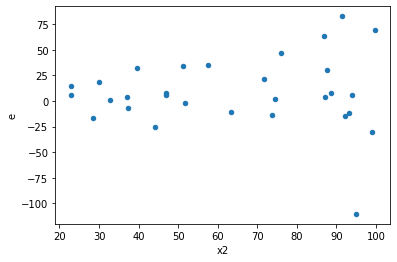

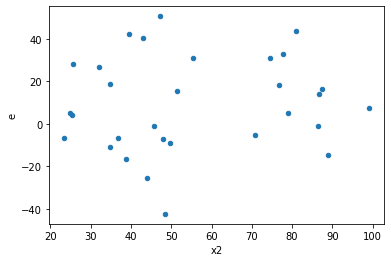

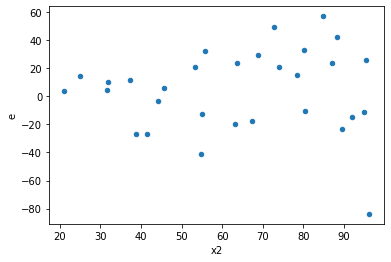

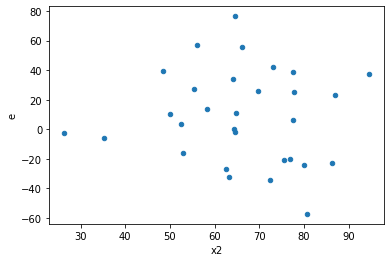

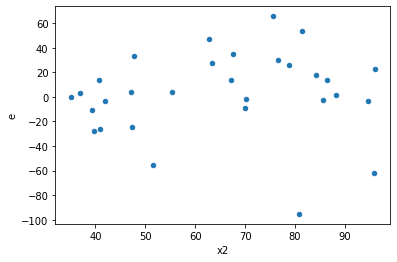

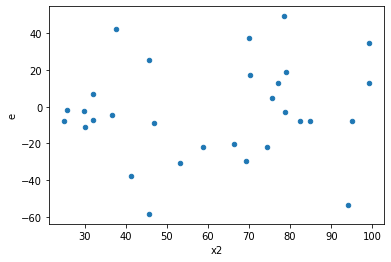

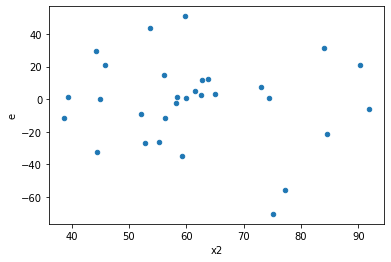

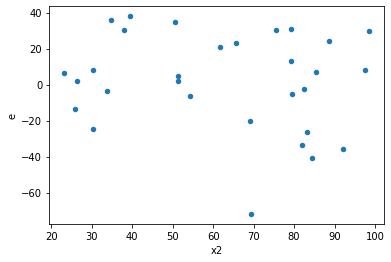

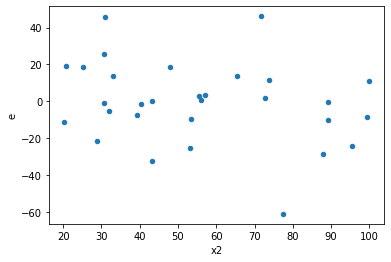

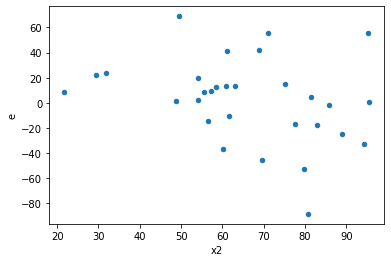

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,13.0,11.0,8589.812580035883,17740.989860126665,660.7548138489141,1612.817260011515,2.4408709951227023,0.1466084022356937,0.9266957988821531,0.07330420111784686,Reject005=1 : Homoscedasticity
4.0,12.0,12.0,4171.122761174944,6514.48209762301,347.5935634312453,542.8735081352509,1.5618054108261195,0.45127697132622635,0.7743615143368868,0.22563848566311318,Reject005=1 : Homoscedasticity
7.0,9.0,15.0,3644.051746561019,15995.278769083407,404.8946385067799,1066.3519179388938,2.6336528482360673,0.09403048383341694,0.9529847580832915,0.04701524191670847,Reject005=1 : Homoscedasticity
8.0,12.0,12.0,4645.862265272108,10609.57636268824,387.1551887726757,884.1313635573533,2.2836614081297646,0.16694776098782915,0.9165261195060854,0.08347388049391458,Reject005=1 : Homoscedasticity
9.0,15.0,9.0,5366.059147644671,5581.878367462795,357.7372765096447,620.2087074958661,1.7336988572929584,0.40752016123803014,0.7962399193809849,0.20376008061901507,Reject005=1 : Homoscedasticity
11.0,6.0,18.0,836.7940185356779,10059.401877026356,139.46566975594632,558.8556598347975,4.007119894184353,0.020167093746028986,0.9899164531269855,0.010083546873014493,Reject005=0 : Heteroscedasticity
12.0,12.0,12.0,7100.672646184137,13216.077335432139,591.7227205153448,1101.3397779526783,1.8612430109046623,0.2956757421078222,0.8521621289460889,0.1478378710539111,Reject005=1 : Homoscedasticity
13.0,12.0,12.0,12519.715769403047,14286.397879689,1043.3096474502538,1190.5331566407501,1.141111998293408,0.8228754137186436,0.5885622931406782,0.4114377068593218,Reject005=1 : Homoscedasticity
15.0,10.0,14.0,6967.433041870554,10336.505494507388,696.7433041870554,738.321821036242,1.059675516936183,0.8965872175837319,0.551706391208134,0.44829360879186597,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,18.0,6.0,14860.186866059497,1358.0703408190643,825.5659370033054,226.34505680317739,0.27416956860499825,0.030268780866696172,Reject005=0 : Heteroscedasticity
1.0,13.0,11.0,8589.812580035883,17740.989860126665,660.7548138489141,1612.817260011515,2.4408709951227023,0.1466084022356937,Reject005=1 : Homoscedasticity
2.0,13.0,11.0,19059.00497468398,4302.522863554126,1466.0773057449214,391.1384421412842,0.26679250855912046,0.026823666598003157,Reject005=0 : Heteroscedasticity
3.0,12.0,12.0,10082.918442234639,2188.2179848516043,840.2432035195533,182.3514987376337,0.21702228351721528,0.013054250719998437,Reject005=0 : Heteroscedasticity
4.0,12.0,12.0,4171.122761174944,6514.48209762301,347.5935634312453,542.8735081352509,1.5618054108261195,0.45127697132622635,Reject005=1 : Homoscedasticity
5.0,10.0,14.0,12198.371555966776,2340.776003981518,1219.8371555966776,167.19828599867986,0.1370660708534457,0.003287551826449254,Reject005=0 : Heteroscedasticity
6.0,12.0,12.0,6708.5192369650495,6201.282980740981,559.0432697470875,516.773581728415,0.9243892372806932,0.893911774014201,Reject005=1 : Homoscedasticity
7.0,9.0,15.0,3644.051746561019,15995.278769083407,404.8946385067799,1066.3519179388938,2.6336528482360673,0.09403048383341694,Reject005=1 : Homoscedasticity
8.0,12.0,12.0,4645.862265272108,10609.57636268824,387.1551887726757,884.1313635573533,2.2836614081297646,0.16694776098782915,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      749
Reject005=0 : Heteroscedasticity    251
Name: Result_test, dtype: int64